##Segmentation

### Load Dataset

In [11]:
from fastai.vision.all import *

In [14]:
path = untar_data(URLs.CAMVID_TINY)
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/codes.txt'),Path('/root/.fastai/data/camvid_tiny/images'),Path('/root/.fastai/data/camvid_tiny/labels')]

In [15]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [17]:
fnames = get_image_files(path/"images")
fnames[0]

Path('/root/.fastai/data/camvid_tiny/images/0001TP_008670.png')

In [18]:
(path/"labels").ls()[0]
def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = fnames, label_func = label_func, codes = codes
)

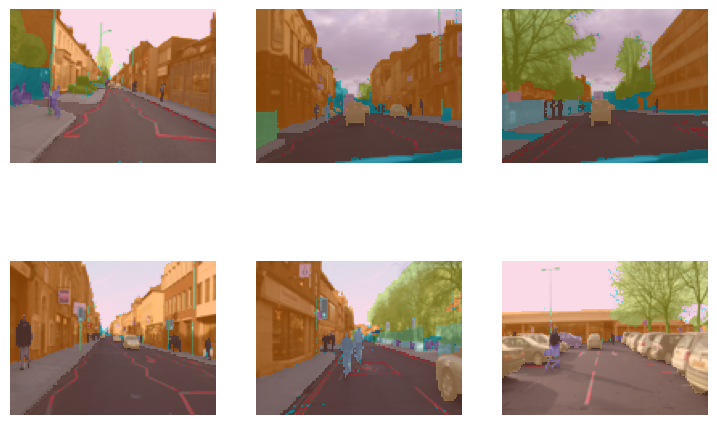

In [19]:
dls.show_batch(max_n=6)

###Creating a Learner

In [20]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(4)

epoch,train_loss,valid_loss,time
0,3.007263,2.551556,01:25


epoch,train_loss,valid_loss,time
0,1.945696,1.625217,01:28
1,1.661865,1.287519,01:29
2,1.441276,1.124271,01:25
3,1.290327,1.108036,01:23


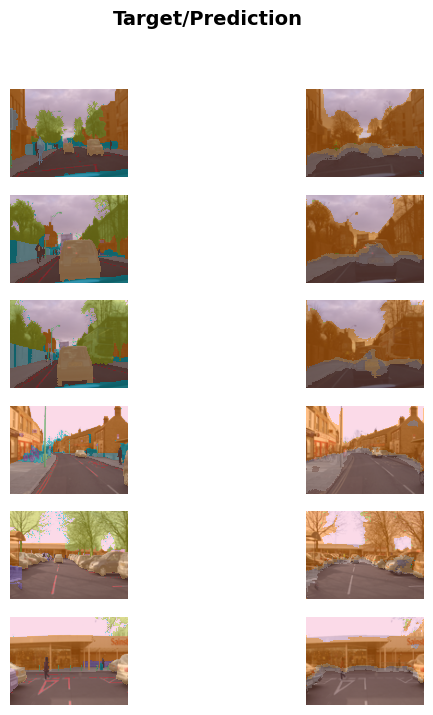

In [21]:
learn.show_results(max_n=6, figsize=(7,8))

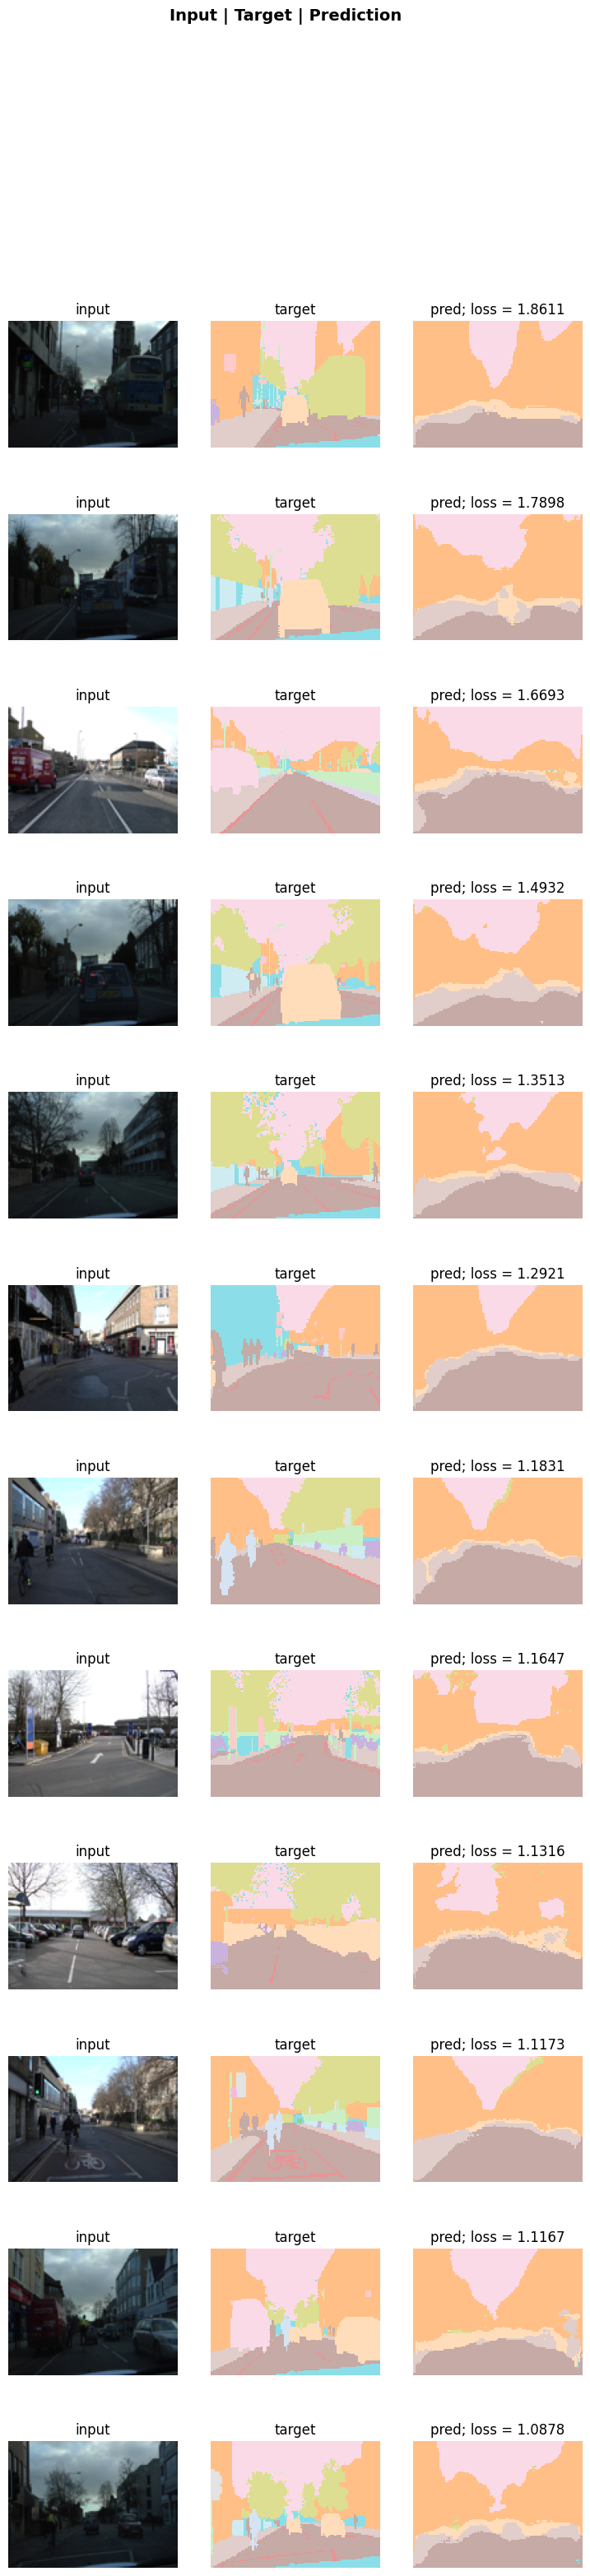

In [22]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=12)